In [64]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Read the job description from the file
with open("job_description.txt", "r") as file:
    job_description = file.read()

# Basic preprocessing
job_description = job_description.lower()  # Convert to lowercase
job_description = re.sub(r'[^a-zA-Z0-9\s]', '', job_description)  # Remove non-alphanumeric characters

# Process the job description using spaCy
doc = nlp(job_description)

# List of keywords representing job titles
job_title_keywords = ["analyst", "developer", "engineer", "scientist", "architect",
                      "manager", "consultant", "specialist", "administrator",
                      "data engineer", "machine learning", "data analyst",
                      "business intelligence", "database administrator",
                      "researcher", "software engineer", "AI engineer", "AI specialist",
                      "data scientist", "software developer", "computer vision engineer",
                      "deep learning engineer", "big data engineer", "NLP engineer",
                      "cloud engineer", "data architect", "security analyst"]

# Initialize variables for job title and company name
job_title = ""
company_name = ""

# Extract job title
for ent in doc.ents:
    lowercase_text = ent.text.lower()
    if any(keyword in lowercase_text for keyword in job_title_keywords):
        job_title = ent.text
        break

# If job title is not found as named entity, search in tokenized text
if not job_title:
    for token in doc:
        lowercase_text = token.text.lower()
        if any(keyword in lowercase_text for keyword in job_title_keywords):
            job_title = token.text
            break

# Extract company name using spaCy NER
for ent in doc.ents:
    if ent.label_ == "ORG":
        company_name = ent.text
        break

# Extract soft skills and technical skills
# More inclusive soft skills patterns
soft_skill_patterns = ["communication", "collaboration", "teamwork", "problem-solving", "creativity", "adaptability", "leadership", "time management"]

# Example using POS tagging to find technical skills
technical_skills = []

for token in doc:
    if token.pos_ == "NOUN" and token.text.lower() not in ["skills", "abilities"]:
        technical_skills.append(token.text)

# Remove duplicates from the list
technical_skills = list(set(technical_skills))

# More inclusive soft skills patterns
soft_skill_patterns = ["communication", "collaboration", "teamwork", "problem-solving", "creativity", "adaptability", "leadership", "time management"]
soft_skills = []

for token in doc:
    if token.pos_ == "NOUN" and token.text.lower() not in ["skills", "abilities"]:
        if token.text.lower() in soft_skill_patterns:
            soft_skills.append(token.text)

# Remove duplicates from the list
soft_skills = list(set(soft_skills))

# List of common action verbs in job postings
job_related_action_verbs = ["develop", "implement", "analyze", "coordinate", "lead", "collaborate", "design", "manage", "optimize", "create", "execute", "facilitate", "evaluate", "synthesize"]

# Extract action words using POS tagging
action_words = []

for token in doc:
    if token.pos_ == "VERB" and token.text.lower() in job_related_action_verbs:
        action_words.append(token.text)

# Remove duplicates from the list
action_words = list(set(action_words))


In [29]:
pip install wordcloud


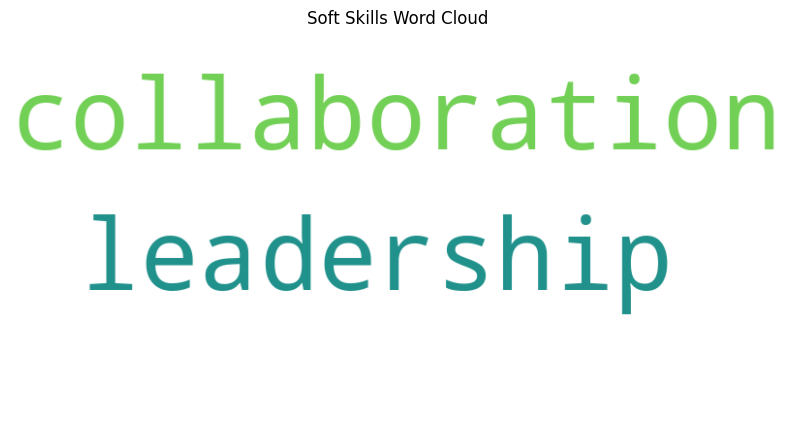

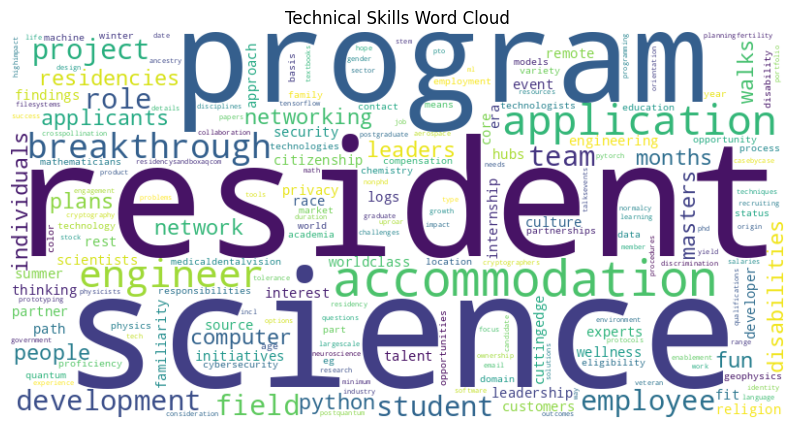

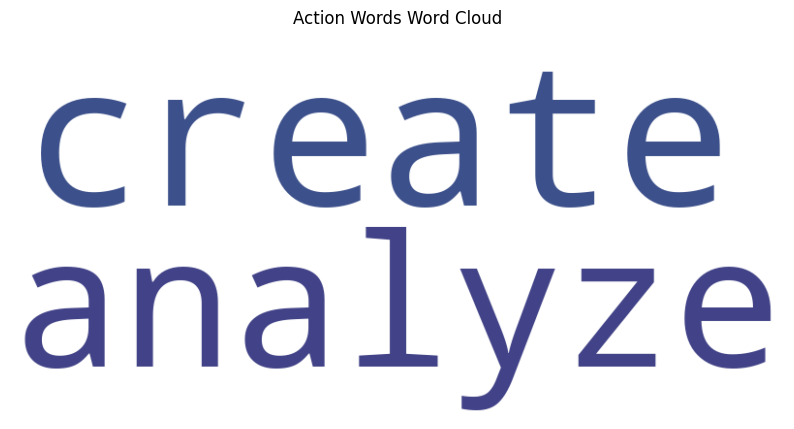

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a DataFrame for better organization
data = {
    'Job Title': [job_title],
    'Company Name': [company_name],
    'Soft Skills': [", ".join(soft_skills)],
    'Technical Skills': [", ".join(technical_skills)],
    'Action Words': [", ".join(action_words)]
}

df = pd.DataFrame(data)

# Function to generate word cloud and plot
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and plot word clouds
generate_word_cloud(", ".join(soft_skills), 'Soft Skills Word Cloud')
generate_word_cloud(", ".join(technical_skills), 'Technical Skills Word Cloud')
generate_word_cloud(", ".join(action_words), 'Action Words Word Cloud')


In [40]:
import pandas as pd

df = pd.DataFrame(data)

df

,Job Title,Company Name,Soft Skills,Technical Skills,Action Words
0,,,"collaboration, creativity","practices, training, power, consumers, hybrid,...","implement, manage, design, create, develop"


In [65]:
# Print formatted information including job title and company name
print("=== Job Information ===")
print(f"Job Title: {job_title}")
print(f"Company Name: {company_name}\n")

print("=== Soft Skills ===")
print(", ".join(soft_skills))
print("\n")

print("=== Technical Skills ===")
print(", ".join(technical_skills))
print("\n")

print("=== Action Words ===")
print(", ".join(action_words))
print("\n")

=== Job Information ===
Job Title: developer
Company Name: quantum

=== Soft Skills ===
collaboration, leadership


=== Technical Skills ===
networking, residencies, computer, months, people, applicants, leaders, fields, masters, disabilities, walks, resident, plans, network, individuals, python, fun, engineering, rest, core, summer, privacy, fit, science, scientists, race, remote, initiatives, citizenship, program, cuttingedge, findings, thinking, leadership, culture, security, worldclass, approach, event, experts, accommodation, logs, talent, era, projects, religion, wellness, path, customers, hubs, interest, developer, familiarity, source, internship, partner, cybersecurity, opportunity, technologies, programs, machine, compensation, application, accommodations, partnerships, education, technology, part, quantum, engineer, physics, medicaldentalvision, variety, basis, breakthroughs, means, breakthrough, disability, responsibilities, family, geophysics, employees, age, color, process

In [61]:
name= input("Please Enter Your Full Name: ")

Please Enter Your Full Name: Karam Issa


In [62]:
import random
# List of template cover letters
template_cover_letters = [
    """
    Dear [Hiring Manager],

    I am writing to express my interest in the [job_title] position at [company_name].
    With a background in [soft_skills] and expertise in [technical_skills],
    I am confident in my ability to contribute to your team.

    During my previous roles, I demonstrated strong [job_related_action_verbs] skills,
    allowing me to [action_words] and [action_words] effectively.
    My experience aligns well with the qualities you seek in a candidate.

    I look forward to the opportunity to discuss how my skills and experiences
    make me a perfect fit for the [job_title] position at [company_name].
    Thank you for considering my application.

    Sincerely,
    [Your Name]
    """,

    """
    Dear [Hiring Manager],

    I am excited to apply for the [job_title] position at [company_name].
    My background in [soft_skills] and proficiency in [technical_skills]
    make me well-equipped to contribute to your dynamic team.

    Throughout my career, I have honed my [job_related_action_verbs] abilities,
    allowing me to [action_words] and [action_words] successfully.
    I am eager to bring my expertise to [company_name] and contribute to the [job_title] role.

    I would welcome the opportunity to discuss further how my skills align with your needs.
    Thank you for considering my application.

    Best Regards,
    [Your Name]
    """,

    """
    Dear [Hiring Manager],

    I am writing to express my interest in the [job_title] position at [company_name].
    With a solid foundation in [soft_skills] and proficiency in [technical_skills],
    I am confident in my ability to make meaningful contributions to your team.

    In my previous roles, I have demonstrated a knack for [job_related_action_verbs],
    enabling me to [action_words] and [action_words] effectively.
    I am eager to leverage my skills and experience to contribute to the success of [company_name].

    I would appreciate the opportunity to discuss how I can bring value to the [job_title] position.
    Thank you for considering my application.

    Sincerely,
    [Your Name]
    """
]



# Randomly select a template cover letter
selected_template = random.choice(template_cover_letters)

# Define the maximum number of skills to include in the cover letter
max_skills_count = 5  # Change this as needed

# Define the maximum number of action verbs and action words to include in the cover letter
max_action_count = 3  # Change this as needed

# Randomly select a subset of soft skills up to 5
selected_soft_skills = random.sample(soft_skills, k=min(max_skills_count, len(soft_skills)))

# Randomly select a subset of technical skills up to 5
selected_technical_skills = random.sample(technical_skills, k=min(max_skills_count, len(technical_skills)))

# Randomly select a subset of job-related action verbs up to 3
selected_action_verbs = random.sample(job_related_action_verbs, k=min(max_action_count, len(job_related_action_verbs)))

# Randomly select a subset of action words up to 3
selected_action_words = random.sample(job_related_action_verbs, k=min(max_action_count, len(job_related_action_verbs)))

# Fill in the placeholders with extracted information
filled_cover_letter = selected_template.replace("[Hiring Manager]", "Hiring Manager") \
                                         .replace("[job_title]", job_title) \
                                         .replace("[company_name]", company_name) \
                                         .replace("[soft_skills]", ", ".join(selected_soft_skills)) \
                                         .replace("[technical_skills]", ", ".join(selected_technical_skills)) \
                                         .replace("[job_related_action_verbs]", ", ".join(selected_action_verbs)) \
                                         .replace("[action_words]", ", ".join(selected_action_words)) \
                                         .replace("[Your Name]", name)

# Print the filled cover letter
print(filled_cover_letter)


    Dear Hiring Manager,

    I am writing to express my interest in the developer position at quantum. 
    With a solid foundation in leadership, collaboration and proficiency in research, postquantum, identity, solutions, technologies, 
    I am confident in my ability to make meaningful contributions to your team.

    In my previous roles, I have demonstrated a knack for optimize, analyze, lead, 
    enabling me to facilitate, design, coordinate and facilitate, design, coordinate effectively. 
    I am eager to leverage my skills and experience to contribute to the success of quantum.

    I would appreciate the opportunity to discuss how I can bring value to the developer position. 
    Thank you for considering my application.

    Sincerely,
    Karam Issa
    


In [63]:
with open("cover_letter_output.txt", "w") as file:
    file.write(filled_cover_letter)